# AlphaGenome 快速入门指南

本 notebook 将帮助您开始使用 AlphaGenome - 一个用于预测基因组调控元件的强大模型。

## 您将学到：
- 如何连接到 AlphaGenome API
- 定义用于分析的基因组区间
- 运行序列预测
- 可视化结果

---

## 1. 导入所需库

In [1]:
# AlphaGenome 库
from alphagenome.data import genome
from alphagenome.models import dna_client

# 可视化
import matplotlib.pyplot as plt

# 我们的自定义工具
import sys
sys.path.insert(0, '/shared/tools')
from alphagenome_tools import quick_plot, monitor_api_quota

print("✓ 所有库已成功导入")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ 所有库已成功导入


## 2. 连接到 AlphaGenome API

In [2]:
import os
from alphagenome.models import dna_client

# 从环境变量获取 API 密钥
api_key = os.environ.get('ALPHAGENOME_API_KEY')
if not api_key:
    raise ValueError(
        "环境变量中未找到 ALPHAGENOME_API_KEY！"
        "请确保在 docker-compose.yml 中已设置"
    )

# 创建模型连接
model = dna_client.create(api_key=api_key)

print("✓ AlphaGenome 连接已建立")
print()

# 检查 API 配额
from alphagenome_tools import monitor_api_quota
monitor = monitor_api_quota()
print(f"API 状态: {monitor}")

✓ AlphaGenome 连接已建立

API 状态: API Usage: 15/1,000,000 calls (999,985 remaining)


## 3. 定义用于分析的基因组区间

让我们分析 22 号染色体上的一个区域。该区域包含有趣的调控元件。

In [3]:
# 定义基因组区间
interval = genome.Interval(
    chromosome='chr22',
    start=35677410,
    end=36725986
)

print(f"分析区间: {interval.chromosome}:{interval.start:,}-{interval.end:,}")
print(f"区间长度: {interval.end - interval.start:,} 碱基对")

分析区间: chr22:35,677,410-36,725,986
区间长度: 1,048,576 碱基对


## 4. 运行序列预测

现在让我们预测该区域的基因表达和其他调控特征。

In [4]:
# 运行预测
print("正在运行 AlphaGenome 预测...")
print("这可能需要一些时间...")

outputs = model.predict_interval(
    interval=interval,
    requested_outputs=[dna_client.OutputType.RNA_SEQ],
    ontology_terms=None
)

print("✓ 预测完成！")

# 更新 API 配额监视器
monitor_api_quota().increment()
print(f"API 状态: {monitor_api_quota()}")

正在运行 AlphaGenome 预测...
这可能需要一些时间...
✓ 预测完成！
API 状态: API Usage: 16/1,000,000 calls (999,984 remaining)


## 5. 可视化结果

让我们创建预测基因表达的快速可视化。

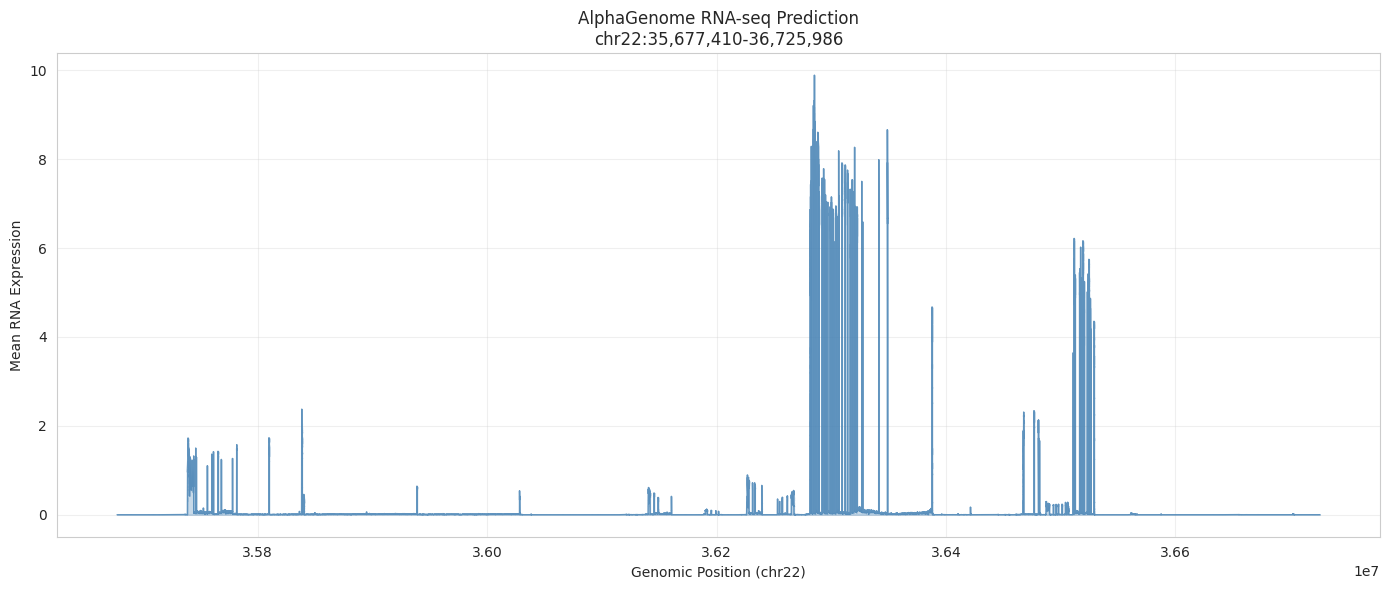

In [5]:
# 创建可视化
fig = quick_plot(outputs, figsize=(14, 6))

if fig:
    plt.show()
else:
    print("使用 AlphaGenome 内置绘图进行可视化:")
    # 如果可用，使用 AlphaGenome 的可视化
    try:
        from alphagenome.visualization import plot_components
        plot_components.plot(outputs)
        plt.show()
    except Exception as e:
        print(f"无法创建可视化: {e}")

## 6. 保存结果

将结果保存到您的个人工作空间以供后续分析。

In [6]:
from pathlib import Path

# 创建结果目录
results_dir = Path.home() / 'work' / 'results' / 'quickstart'
results_dir.mkdir(parents=True, exist_ok=True)

# 保存图表
if fig:
    fig_path = results_dir / 'quickstart_visualization.png'
    fig.savefig(fig_path, bbox_inches='tight', dpi=300)
    print(f"✓ 图表已保存至: {fig_path}")

# 保存元数据
metadata_path = results_dir / 'metadata.txt'
with open(metadata_path, 'w') as f:
    f.write(f"区间: {interval.chromosome}:{interval.start}-{interval.end}\n")
    f.write(f"日期: {outputs.timestamp if hasattr(outputs, 'timestamp') else '无'}\n")
    f.write(f"输出类型: RNA_SEQ\n")

print(f"✓ 元数据已保存至: {metadata_path}")
print(f"\n所有结果已保存到: {results_dir}")

✓ 图表已保存至: /home/admin/work/results/quickstart/quickstart_visualization.png
✓ 元数据已保存至: /home/admin/work/results/quickstart/metadata.txt

所有结果已保存到: /home/admin/work/results/quickstart


## 总结

恭喜！您已完成第一次 AlphaGenome 分析：

✓ 连接到 AlphaGenome API  
✓ 定义了基因组区间  
✓ 运行了序列预测  
✓ 可视化了结果  
✓ 将结果保存到工作空间  

### 下一步：
- 尝试 **02_variant_analysis.ipynb** 来分析遗传变异
- 探索 **03_batch_analysis.ipynb** 进行批量处理
- 查看 **04_visualization.ipynb** 了解高级绘图

### 提示：
- 结果保存在 `~/work/results/` 中
- 使用以下命令检查 API 配额: `print(monitor_api_quota())`
- 将此 notebook 复制到您的工作空间以进行修改和实验